In [1]:
import os
import cv2 # OpenCV for image handling
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.utils import to_categorical

# --- 1. Define Paths ---
# !!! IMPORTANT: Update this path to your dataset folder !!!
dataset_path = 'import os'
import cv2 # OpenCV for image handling
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.utils import to_categorical

# --- 1. Define Paths ---
# !!! IMPORTANT: Update this path to your dataset folder !!!
dataset_path = 'C:\Deepika\VIP_25\dataset'
classes = ['wrinkles', 'dark_spots', 'puffy_eyes', 'clear_skin']
IMG_SIZE = 224 # The required size for EfficientNetB0

# --- 2. Load, Resize, and Normalize Images ---
images = []
labels = []

print("Loading images...")
for label_index, category in enumerate(classes):
    folder_path = os.path.join(dataset_path, category)
    for img_name in os.listdir(folder_path):
        img_path = os.path.join(folder_path, img_name)
        img = cv2.imread(img_path)
        if img is not None:
            resized_img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
            normalized_img = resized_img / 255.0 # Scale pixels to 0-1
            images.append(normalized_img)
            labels.append(label_index) # Assign numerical label

# Convert to NumPy arrays for TensorFlow
images = np.array(images)
labels = np.array(labels)
print(f"✅ Done! Loaded {len(images)} images.")
classes = ['wrinkles', 'dark_spots', 'puffy_eyes', 'clear_skinadhi']
IMG_SIZE = 224 # The required size for EfficientNetB0

# --- 2. Load, Resize, and Normalize Images ---
images = []
labels = []

print("Loading images...")
for label_index, category in enumerate(classes):
    folder_path = os.path.join(dataset_path, category)
    for img_name in os.listdir(folder_path):
        img_path = os.path.join(folder_path, img_name)
        img = cv2.imread(img_path)
        if img is not None:
            resized_img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
            normalized_img = resized_img / 255.0 # Scale pixels to 0-1
            images.append(normalized_img)
            labels.append(label_index) # Assign numerical label

# Convert to NumPy arrays for TensorFlow
images = np.array(images)
labels = np.array(labels)
print(f"✅ Done! Loaded {len(images)} images.")

<>:19: SyntaxWarning: invalid escape sequence '\D'
<>:19: SyntaxWarning: invalid escape sequence '\D'
C:\Users\A Satya Sai Deepika\AppData\Local\Temp\ipykernel_14712\1822728938.py:19: SyntaxWarning: invalid escape sequence '\D'
  dataset_path = 'C:\Deepika\VIP_25\dataset'


Loading images...
✅ Done! Loaded 400 images.
Loading images...


C:\Users\A Satya Sai Deepika\AppData\Local\Temp\ipykernel_14712\1822728938.py:19: SyntaxWarning: invalid escape sequence '\D'
  dataset_path = 'C:\Deepika\VIP_25\dataset'


FileNotFoundError: [WinError 3] The system cannot find the path specified: 'C:\\Deepika\\VIP_25\\dataset\\clear_skinadhi'

C:\Users\A Satya Sai Deepika\AppData\Local\Temp\ipykernel_14712\811348857.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=[classes[i] for i in unique_labels], y=counts, palette='viridis')


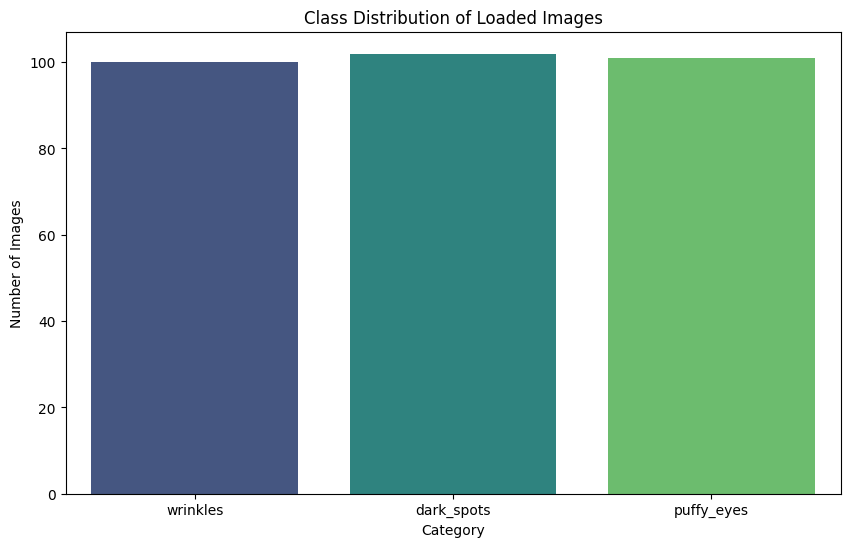

In [2]:
# Get the count of images for each class
unique_labels, counts = np.unique(labels, return_counts=True)

# Create the plot
plt.figure(figsize=(10, 6))
sns.barplot(x=[classes[i] for i in unique_labels], y=counts, palette='viridis')
plt.title('Class Distribution of Loaded Images')
plt.ylabel('Number of Images')
plt.xlabel('Category')
plt.show()

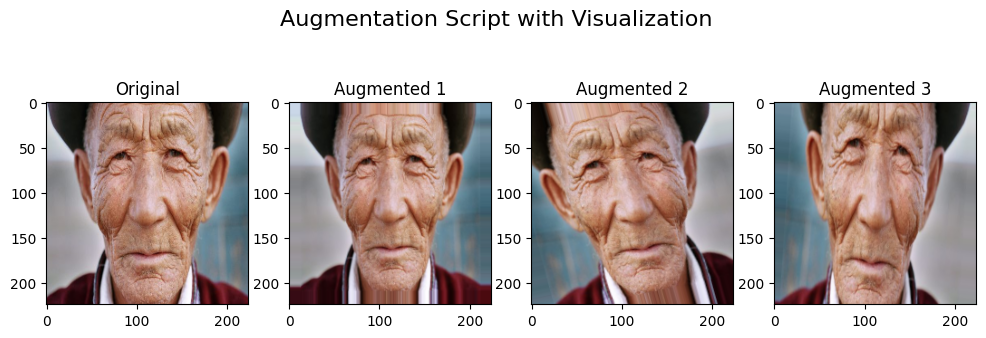


✅ Labels successfully one-hot encoded.
Original label of first image: 0
One-hot encoded label: [1. 0. 0. 0.]


In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# --- 1. Augmentation Visualization ---
datagen = ImageDataGenerator(
    rotation_range=20,
    zoom_range=0.15,
    horizontal_flip=True) # Apply flip, rotation, and zoom

# Pick a sample image
sample_image = images[0]
sample_image_expanded = np.expand_dims(sample_image, axis=0)

# Show original vs. augmented
plt.figure(figsize=(12, 4))
plt.subplot(1, 4, 1)
plt.title("Original")
plt.imshow(cv2.cvtColor(sample_image.astype(np.float32), cv2.COLOR_BGR2RGB)) # Convert color for display

i = 1
for batch in datagen.flow(sample_image_expanded, batch_size=1):
    plt.subplot(1, 4, i + 1)
    plt.title(f"Augmented {i}")
    plt.imshow(cv2.cvtColor(batch[0], cv2.COLOR_BGR2RGB))
    i += 1
    if i > 3:
        break
plt.suptitle("Augmentation Script with Visualization", fontsize=16)
plt.show()

# --- 2. One-Hot Encode Labels ---
one_hot_labels = to_categorical(labels, num_classes=len(classes))
print("\n✅ Labels successfully one-hot encoded.")
print("Original label of first image:", labels[0])
print("One-hot encoded label:", one_hot_labels[0])

Found 319 images belonging to 4 classes.
Found 78 images belonging to 4 classes.
Loading InceptionV3 model...
Starting training...


c:\Deepika\VIP_25\venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/80
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.3162 - loss: 2.1876

c:\Deepika\VIP_25\venv\Lib\site-packages\PIL\Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(



Epoch 1: val_accuracy improved from None to 0.48718, saving model to best_inceptionv3_model.h5


10/10 ━━━━━━━━━━━━━━━━━━━━ 142s 7s/step - accuracy: 0.3793 - loss: 1.9703 - val_accuracy: 0.4872 - val_loss: 1.2428 - learning_rate: 1.0000e-04
Epoch 2/80
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.5231 - loss: 1.4394
Epoch 2: val_accuracy improved from 0.48718 to 0.57692, saving model to best_inceptionv3_model.h5


10/10 ━━━━━━━━━━━━━━━━━━━━ 63s 6s/step - accuracy: 0.5893 - loss: 1.1856 - val_accuracy: 0.5769 - val_loss: 1.1254 - learning_rate: 1.0000e-04
Epoch 3/80
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14s/step - accuracy: 0.6693 - loss: 0.9727 
Epoch 3: val_accuracy improved from 0.57692 to 0.62821, saving model to best_inceptionv3_model.h5


10/10 ━━━━━━━━━━━━━━━━━━━━ 140s 15s/step - accuracy: 0.7085 - loss: 0.9175 - val_accuracy: 0.6282 - val_loss: 1.0364 - learning_rate: 1.0000e-04
Epoch 4/80
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.7800 - loss: 0.6577
Epoch 4: val_accuracy did not improve from 0.62821
10/10 ━━━━━━━━━━━━━━━━━━━━ 67s 7s/step - accuracy: 0.7806 - loss: 0.6484 - val_accuracy: 0.5769 - val_loss: 1.0045 - learning_rate: 1.0000e-04
Epoch 5/80
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.7817 - loss: 0.5813
Epoch 5: val_accuracy improved from 0.62821 to 0.66667, saving model to best_inceptionv3_model.h5


10/10 ━━━━━━━━━━━━━━━━━━━━ 65s 6s/step - accuracy: 0.8182 - loss: 0.5528 - val_accuracy: 0.6667 - val_loss: 0.9370 - learning_rate: 1.0000e-04
Epoch 6/80
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 74s/step - accuracy: 0.8575 - loss: 0.4159  
Epoch 6: val_accuracy did not improve from 0.66667
10/10 ━━━━━━━━━━━━━━━━━━━━ 718s 79s/step - accuracy: 0.8527 - loss: 0.4131 - val_accuracy: 0.6282 - val_loss: 0.9248 - learning_rate: 1.0000e-04
Epoch 7/80
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 67s/step - accuracy: 0.8596 - loss: 0.4357  
Epoch 7: val_accuracy improved from 0.66667 to 0.74359, saving model to best_inceptionv3_model.h5


10/10 ━━━━━━━━━━━━━━━━━━━━ 730s 73s/step - accuracy: 0.8401 - loss: 0.4309 - val_accuracy: 0.7436 - val_loss: 0.8071 - learning_rate: 1.0000e-04
Epoch 8/80
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 73s/step - accuracy: 0.8892 - loss: 0.3498  
Epoch 8: val_accuracy improved from 0.74359 to 0.76923, saving model to best_inceptionv3_model.h5


10/10 ━━━━━━━━━━━━━━━━━━━━ 830s 80s/step - accuracy: 0.8966 - loss: 0.3224 - val_accuracy: 0.7692 - val_loss: 0.6882 - learning_rate: 1.0000e-04
Epoch 9/80
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 68s/step - accuracy: 0.9221 - loss: 0.2792  
Epoch 9: val_accuracy improved from 0.76923 to 0.79487, saving model to best_inceptionv3_model.h5


10/10 ━━━━━━━━━━━━━━━━━━━━ 741s 74s/step - accuracy: 0.8997 - loss: 0.3054 - val_accuracy: 0.7949 - val_loss: 0.6456 - learning_rate: 1.0000e-04
Epoch 10/80
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 49s/step - accuracy: 0.9019 - loss: 0.2904 
Epoch 10: val_accuracy improved from 0.79487 to 0.80769, saving model to best_inceptionv3_model.h5


10/10 ━━━━━━━━━━━━━━━━━━━━ 544s 52s/step - accuracy: 0.9248 - loss: 0.2136 - val_accuracy: 0.8077 - val_loss: 0.5682 - learning_rate: 1.0000e-04
Epoch 11/80
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 30s/step - accuracy: 0.9120 - loss: 0.2631 
Epoch 11: val_accuracy improved from 0.80769 to 0.84615, saving model to best_inceptionv3_model.h5


10/10 ━━━━━━━━━━━━━━━━━━━━ 346s 33s/step - accuracy: 0.9122 - loss: 0.2522 - val_accuracy: 0.8462 - val_loss: 0.5048 - learning_rate: 1.0000e-04
Epoch 12/80
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 29s/step - accuracy: 0.9322 - loss: 0.1711 
Epoch 12: val_accuracy improved from 0.84615 to 0.87179, saving model to best_inceptionv3_model.h5


10/10 ━━━━━━━━━━━━━━━━━━━━ 319s 32s/step - accuracy: 0.9498 - loss: 0.1510 - val_accuracy: 0.8718 - val_loss: 0.4454 - learning_rate: 1.0000e-04
Epoch 13/80
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 29s/step - accuracy: 0.9665 - loss: 0.1104 
Epoch 13: val_accuracy did not improve from 0.87179
10/10 ━━━━━━━━━━━━━━━━━━━━ 314s 31s/step - accuracy: 0.9624 - loss: 0.1141 - val_accuracy: 0.8077 - val_loss: 0.4663 - learning_rate: 1.0000e-04
Epoch 14/80
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 29s/step - accuracy: 0.9841 - loss: 0.0798 
Epoch 14: val_accuracy did not improve from 0.87179
10/10 ━━━━━━━━━━━━━━━━━━━━ 314s 31s/step - accuracy: 0.9624 - loss: 0.1229 - val_accuracy: 0.7821 - val_loss: 0.5341 - learning_rate: 1.0000e-04
Epoch 15/80
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 30s/step - accuracy: 0.9662 - loss: 0.1069 
Epoch 15: val_accuracy did not improve from 0.87179
10/10 ━━━━━━━━━━━━━━━━━━━━ 330s 32s/step - accuracy: 0.9718 - loss: 0.1264 - val_accuracy: 0.8333 - val_loss: 0.4529 - learning_rate: 1.0000e-04
Epoch 

10/10 ━━━━━━━━━━━━━━━━━━━━ 61s 6s/step - accuracy: 0.9906 - loss: 0.0349 - val_accuracy: 0.8846 - val_loss: 0.3455 - learning_rate: 1.0000e-04
Epoch 27/80
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.9888 - loss: 0.0294
Epoch 27: val_accuracy did not improve from 0.88462
10/10 ━━━━━━━━━━━━━━━━━━━━ 54s 5s/step - accuracy: 0.9906 - loss: 0.0288 - val_accuracy: 0.8333 - val_loss: 0.3763 - learning_rate: 1.0000e-04
Epoch 28/80
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.9695 - loss: 0.0859
Epoch 28: val_accuracy did not improve from 0.88462
10/10 ━━━━━━━━━━━━━━━━━━━━ 53s 5s/step - accuracy: 0.9749 - loss: 0.0753 - val_accuracy: 0.8846 - val_loss: 0.3094 - learning_rate: 1.0000e-04
Epoch 29/80
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8s/step - accuracy: 0.9993 - loss: 0.0235
Epoch 29: val_accuracy did not improve from 0.88462
10/10 ━━━━━━━━━━━━━━━━━━━━ 100s 11s/step - accuracy: 0.9969 - loss: 0.0240 - val_accuracy: 0.8590 - val_loss: 0.3159 - learning_rate: 1.0000e-04
Epoch 30/80
10/10 

10/10 ━━━━━━━━━━━━━━━━━━━━ 362s 36s/step - accuracy: 0.9906 - loss: 0.0265 - val_accuracy: 0.9103 - val_loss: 0.2006 - learning_rate: 1.0000e-04
Epoch 32/80
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 18s/step - accuracy: 0.9951 - loss: 0.0199 
Epoch 32: val_accuracy did not improve from 0.91026
10/10 ━━━━━━━━━━━━━━━━━━━━ 204s 19s/step - accuracy: 0.9937 - loss: 0.0255 - val_accuracy: 0.8846 - val_loss: 0.3416 - learning_rate: 1.0000e-04
Epoch 33/80
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.9855 - loss: 0.0337
Epoch 33: val_accuracy did not improve from 0.91026
10/10 ━━━━━━━━━━━━━━━━━━━━ 56s 6s/step - accuracy: 0.9843 - loss: 0.0367 - val_accuracy: 0.8333 - val_loss: 0.5222 - learning_rate: 1.0000e-04
Epoch 34/80
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.9895 - loss: 0.0258
Epoch 34: val_accuracy did not improve from 0.91026
10/10 ━━━━━━━━━━━━━━━━━━━━ 57s 6s/step - accuracy: 0.9843 - loss: 0.0419 - val_accuracy: 0.8718 - val_loss: 0.3473 - learning_rate: 1.0000e-04
Epoch 35/80
10

Model saved as 'final_inceptionv3_model.h5'.
Final Training Accuracy: 98.75%
Final Validation Accuracy: 89.74%


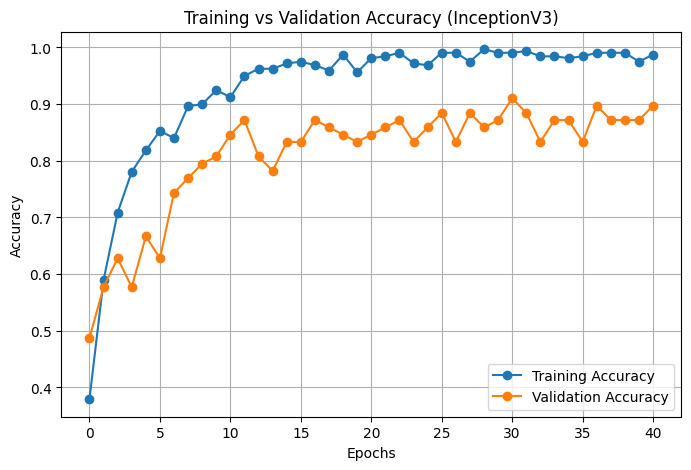

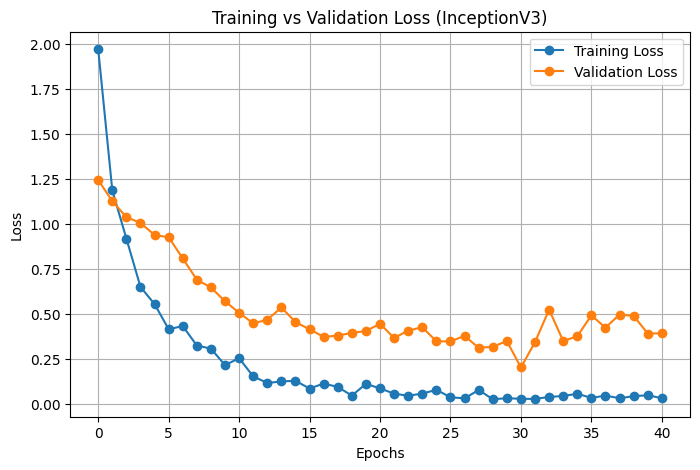

In [14]:
### Module 3: Model Training with InceptionV3

import matplotlib.pyplot as plt
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator

dataset_path = r"C:\Deepika\VIP_25\dataset"

datagen = ImageDataGenerator(
 rescale=1./255,
 rotation_range=20,
 zoom_range=0.2,
 horizontal_flip=True,
 validation_split=0.2
)

train_gen = datagen.flow_from_directory(
 dataset_path,
 target_size=(299, 299),
 batch_size=32,
 class_mode='categorical',
 subset='training',
 color_mode='rgb'
)

val_gen = datagen.flow_from_directory(
 dataset_path,
 target_size=(299, 299),
 batch_size=32,
 class_mode='categorical',
 subset='validation',
 color_mode='rgb'
)

print("Loading InceptionV3 model...")
base_model = InceptionV3(
 include_top=False,
 weights='imagenet',
 input_shape=(299, 299, 3)
)

for layer in base_model.layers:
 layer.trainable = True

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
x = Dense(256, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
output = Dense(train_gen.num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output)

model.compile(
 optimizer=Adam(1e-4),
 loss='categorical_crossentropy',
 metrics=['accuracy']
)

callbacks = [
 EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, verbose=1),
 ModelCheckpoint('best_inceptionv3_model.h5', monitor='val_accuracy', save_best_only=True, verbose=1),
 ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6, verbose=1)
]

print("Starting training...")
history = model.fit(
 train_gen,
 validation_data=val_gen,
 epochs=80,
 callbacks=callbacks,
 verbose=1
)

model.save('final_inceptionv3_model.h5')
print("Model saved as 'final_inceptionv3_model.h5'.")

final_train_acc = history.history['accuracy'][-1] * 100
final_val_acc = history.history['val_accuracy'][-1] * 100
print(f"Final Training Accuracy: {final_train_acc:.2f}%")
print(f"Final Validation Accuracy: {final_val_acc:.2f}%")

plt.figure(figsize=(8,5))
plt.plot(history.history['accuracy'], label='Training Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title("Training vs Validation Accuracy (InceptionV3)")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(8,5))
plt.plot(history.history['loss'], label='Training Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
plt.title("Training vs Validation Loss (InceptionV3)")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

In [34]:
!pip install deepface

  Using cached filelock-3.20.0-py3-none-any.whl.metadata (2.1 kB)
   ---------------------------------------- 0.0/1.9 MB ? eta -:--:--
   ---------------- ----------------------- 0.8/1.9 MB 6.7 MB/s eta 0:00:01
   ---------------------------------------- 1.9/1.9 MB 4.0 MB/s eta 0:00:00
Using cached filelock-3.20.0-py3-none-any.whl (16 kB)



[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [36]:
!pip install tf-keras

   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   ------------------ --------------------- 0.8/1.7 MB 6.7 MB/s eta 0:00:01
   ---------------------------------------- 1.7/1.7 MB 4.4 MB/s eta 0:00:00



[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.applications.inception_v3 import preprocess_input

# NEW IMPORT
from deepface import DeepFace 

# --- 1. Configuration ---
SKIN_MODEL_IMG_SIZE = 299  # The input size for your InceptionV3 model
skin_model_path = 'best_inceptionv3_model.h5'
face_cascade_path = cv2.data.haarcascades + 'haarcascade_frontalface_default.xml'

# Manually define the class list (alphabetical order)
classes = ['clear_skin', 'dark_spots', 'puffy_eyes', 'wrinkles']
print(f"Loaded classes: {classes}")

# --- 2. Load Models ---
try:
    # Load your trained skin model
    skin_model = load_model(skin_model_path)
    print(f"Skin model loaded successfully from {skin_model_path}")
    
    # Load the face cascade
    face_cascade = cv2.CascadeClassifier(face_cascade_path)
    if face_cascade.empty():
        print("ERROR: Could not load Haar Cascade.")
    else:
        print("Face cascade loaded successfully.")
    
    # "Warm up" DeepFace. This will download the necessary age/gender models
    # We give it a blank image just to trigger the download.
    print("Initializing DeepFace (this may take a moment to download models)...")
    _ = DeepFace.analyze(img_path = np.zeros((100, 100, 3), dtype=np.uint8), 
                         actions = ['age', 'gender'], 
                         enforce_detection=False)
    print("✅ DeepFace models are ready.")
        
except Exception as e:
    print(f"Error loading models: {e}")


Loaded classes: ['clear_skin', 'dark_spots', 'puffy_eyes', 'wrinkles']


Skin model loaded successfully from best_inceptionv3_model.h5
Face cascade loaded successfully.
Initializing DeepFace (this may take a moment to download models)...


Action: age:   0%|          | 0/2 [00:00<?, ?it/s]    

25-10-24 19:43:29 - 🔗 age_model_weights.h5 will be downloaded from https://github.com/serengil/deepface_models/releases/download/v1.0/age_model_weights.h5 to C:\Users\A Satya Sai Deepika\.deepface\weights\age_model_weights.h5...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/age_model_weights.h5
To: C:\Users\A Satya Sai Deepika\.deepface\weights\age_model_weights.h5
100%|██████████| 539M/539M [02:27<00:00, 3.65MB/s]
Action: gender:  50%|█████     | 1/2 [02:32<02:32, 152.17s/it]

25-10-24 19:46:04 - 🔗 gender_model_weights.h5 will be downloaded from https://github.com/serengil/deepface_models/releases/download/v1.0/gender_model_weights.h5 to C:\Users\A Satya Sai Deepika\.deepface\weights\gender_model_weights.h5...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/gender_model_weights.h5
To: C:\Users\A Satya Sai Deepika\.deepface\weights\gender_model_weights.h5
100%|██████████| 537M/537M [02:31<00:00, 3.55MB/s]
Action: gender: 100%|██████████| 2/2 [05:09<00:00, 154.84s/it]

✅ DeepFace models are ready.


In [ ]:
def predict_skin_and_age(image_path):
    # Load the image (in BGR format)
    img = cv2.imread(image_path)
    if img is None:
        print(f"Error: Could not read image at {image_path}")
        return

    # Convert to grayscale for face detection
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Detect faces
    faces = face_cascade.detectMultiScale(gray_img, scaleFactor=1.1, minNeighbors=5, minSize=(100, 100))
    print(f"\nFound {len(faces)} face(s) in the image.")

    # Loop over each detected face
    for (x, y, w, h) in faces:
        # Crop the face from the original color image
        face_roi = img[y:y+h, x:x+w]

        # --- 1. Skin Sign Prediction (Your Model) ---
        resized_skin = cv2.resize(face_roi, (SKIN_MODEL_IMG_SIZE, SKIN_MODEL_IMG_SIZE))
        input_skin = np.expand_dims(resized_skin, axis=0)
        input_skin = preprocess_input(input_skin) # Inception's preprocessor

        skin_predictions = skin_model.predict(input_skin)[0]

        skin_text = ""
        for i, prob in enumerate(skin_predictions):
            skin_text += f"{classes[i]}: {prob*100:.1f}%  "

        # --- 2. Age Prediction (NEW: Using DeepFace) ---
        try:
            analysis = DeepFace.analyze(
                img_path = face_roi,
                actions = ['age', 'gender'],
                enforce_detection=False # We already detected the face
            )
            result = analysis[0]
            predicted_age = result['age']
            predicted_gender = result['dominant_gender'].capitalize()
            age_text = f"Estimated Age: ~{predicted_age})"

        except Exception as e:
            print(f"Age/Gender analysis failed for one face: {e}")
            age_text = "Age: N/A"

        # --- 3. Draw Results on Image ---
        final_text = f"{age_text} | {skin_text}"

        cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)

        # --- FONT SIZE INCREASED HERE ---
        font_scale = 0.3
        thickness = 1
        # --------------------------------

        (text_width, text_height), _ = cv2.getTextSize(final_text, cv2.FONT_HERSHEY_SIMPLEX, font_scale, thickness)
        # Adjust background rectangle position/size if needed
        cv2.rectangle(img, (x, y - text_height - 10), (x + text_width, y), (0, 255, 0), -1)
        # Draw the text with the new size/thickness
        cv2.putText(img, final_text, (x, y - 5), cv2.FONT_HERSHEY_SIMPLEX, font_scale, (0, 0, 0), thickness)


    # Display the final image
    print("Displaying prediction results...")
    plt.figure(figsize=(12, 12))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()


Found 1 face(s) in the image.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


Action: gender: 100%|██████████| 2/2 [00:00<00:00,  3.79it/s]

Displaying prediction results...


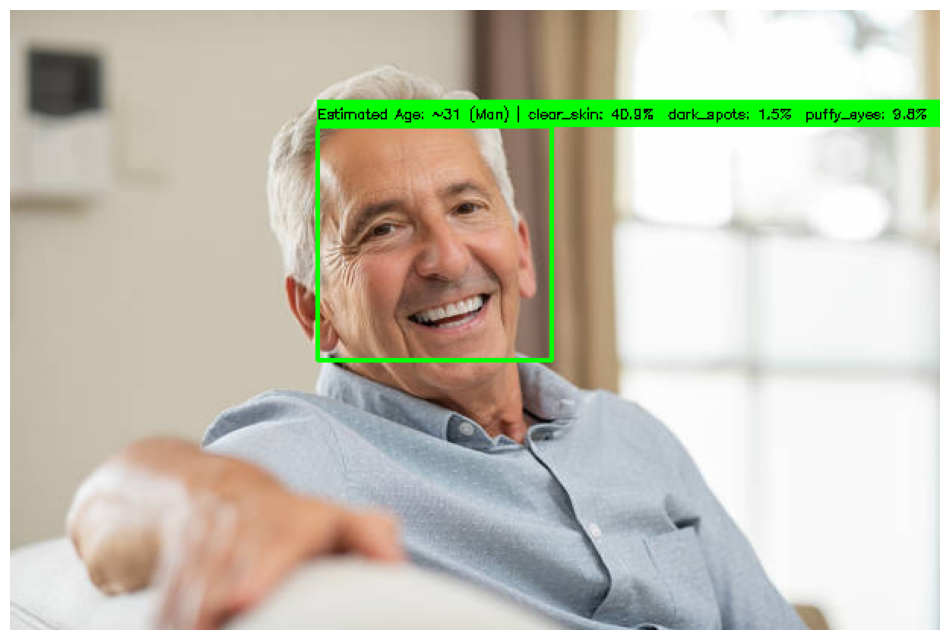

In [26]:
# --- 12. Run Prediction on a Test Image ---

test_image_path = r'test\1.jpg' 
predict_skin_and_age(test_image_path)